# Importing necessary libraries

In [93]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
import plotly.express as px
import cufflinks as cf
cf.go_offline()
from sklearn.model_selection import train_test_split
style.use('fivethirtyeight')

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

%matplotlib inline

# Getting insight of the data and doing some transformation

In [47]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')
df

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


# 📌
Here we can see data is not given in proper format.

As per the dataset information, The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

So we wil divide the dataset based on two region, and concate in a single dataframe

In [48]:
# Bejaia Region Dataset 

df_br=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', skiprows=1)
df_br=df_br.loc[:121,:]
df_br['Region']='BR'
df_br

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,BR
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,BR
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,BR
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,BR
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,BR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,09,2012,31,54,11,0,82,6,16.3,2.5,6.2,1.7,not fire,BR
118,27,09,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire,BR
119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,BR
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,BR


In [49]:
# Sidi-Bel Abbes Region Dataset

df_sbar=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', skiprows=1)
df_sbar=df_sbar.loc[124:, :]
df_sbar['Region']='SBAR'
df_sbar

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,SBAR
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,SBAR
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,SBAR
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,SBAR
128,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,SBAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,SBAR
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,SBAR
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,SBAR
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,SBAR


In [50]:
data=pd.concat([df_br, df_sbar], axis=0, ignore_index=True)
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,BR
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,BR
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,BR
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,BR
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,BR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,SBAR
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,SBAR
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,SBAR
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,SBAR


In [51]:
data.dtypes

day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region         object
dtype: object

In [52]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244,244,244,244,244,244,244,244,244,244,244,244,244,243,244
unique,31,4,1,19,62,18,39,173,166,198,106,174,127,8,2
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire,BR
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131,122


In [53]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [54]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

# 📌
'Classes  ' column name has extra spaces, we will remove the space

In [55]:
updated_column=data.columns.str.rstrip()
updated_column=updated_column.str.lstrip()
data.columns=updated_column

In [56]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [57]:
data['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [58]:
data['Classes']=data['Classes'].str.rstrip()

In [59]:
data['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [60]:
data[data['Classes'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,SBAR


# 📌

We will drop the row having null because data in DC and FWI are not proper

In [61]:
data=data.dropna()

## Saving dataset for analysis

In [62]:
data.to_csv('forest_fire_dataset_processed.csv', header=True, index=None)

## Import processed dataset

In [63]:
dataset=pd.read_csv('forest_fire_dataset_processed.csv')
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,BR
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,BR
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,BR
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,BR
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,BR


## Splitting the data into train and test

In [64]:
x=dataset.drop(columns=['Classes'])
y=dataset['Classes']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

## Creating new dataframe with x_train & y_train for EDA

In [65]:
y_train=pd.DataFrame(y_train)

In [66]:
df=pd.concat([X_train,y_train], axis=1)
df=df.reset_index(drop=True)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,30,6,2012,33,50,14,0.0,88.7,22.9,92.8,7.2,28.3,12.9,BR,fire
1,13,7,2012,34,81,15,0.0,81.8,9.7,37.2,3.0,11.7,3.4,BR,not fire
2,24,9,2012,29,65,19,0.6,68.3,5.5,15.2,1.5,5.8,0.7,BR,not fire
3,15,7,2012,34,45,17,0.0,90.5,18.0,24.1,10.9,17.7,14.1,SBAR,fire
4,9,9,2012,30,80,15,0.0,83.1,7.9,34.5,3.5,10.0,3.7,SBAR,fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,27,8,2012,33,82,21,0.0,84.9,47.0,200.2,4.4,59.3,13.2,BR,fire
190,12,9,2012,29,88,13,0.0,71.0,2.6,16.6,1.2,3.7,0.5,BR,not fire
191,7,8,2012,32,69,16,0.0,86.5,15.5,48.6,5.5,17.2,8.0,BR,fire
192,25,6,2012,31,64,15,0.0,86.7,14.2,63.8,5.7,18.3,8.4,BR,fire


In [67]:
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Region          object
Classes         object
dtype: object

In [68]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,194.000000,194.000000,194.0,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,16.206186,7.438144,2012.0,32.025773,62.262887,15.567010,0.826289,77.425773,14.623196,48.177835,4.703608,16.582474,7.039691
std,8.636515,1.128431,0.0,3.666733,14.970713,2.955305,2.171263,14.597542,12.394564,45.445267,4.195401,14.037714,7.601474
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,30.500000,0.700000,7.000000,0.000000,1.100000,0.000000
25%,9.000000,6.000000,2012.0,30.000000,53.000000,14.000000,0.000000,70.125000,5.850000,11.350000,1.300000,6.125000,0.700000
50%,16.000000,7.000000,2012.0,32.000000,63.500000,15.000000,0.000000,83.200000,11.250000,33.800000,3.300000,12.300000,4.150000
75%,24.000000,8.000000,2012.0,35.000000,73.750000,17.000000,0.500000,88.175000,20.675000,70.050000,7.100000,22.400000,11.975000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,18.500000,68.000000,31.100000


In [69]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Region         0
Classes        0
dtype: int64

# 📌

No null values found

In [70]:
for column in df:
    print(column, len(df[column].unique()))

day 31
month 4
year 1
Temperature 19
RH 59
Ws 18
Rain 33
FFMC 150
DMC 141
DC 159
ISI 94
BUI 153
FWI 109
Region 2
Classes 2


# 📌

1. Adding a new column 'day_name' using 'day', 'month', 'year' column
2. Converting the 'month' column to exact name name of the month

In [71]:
df['day_name']=pd.to_datetime(df[['day', 'month', 'year']]).apply(lambda x: x.strftime("%a"))
df['month']=pd.to_datetime(df[['day', 'month', 'year']]).apply(lambda x: x.strftime("%b"))

# Visualizing the data

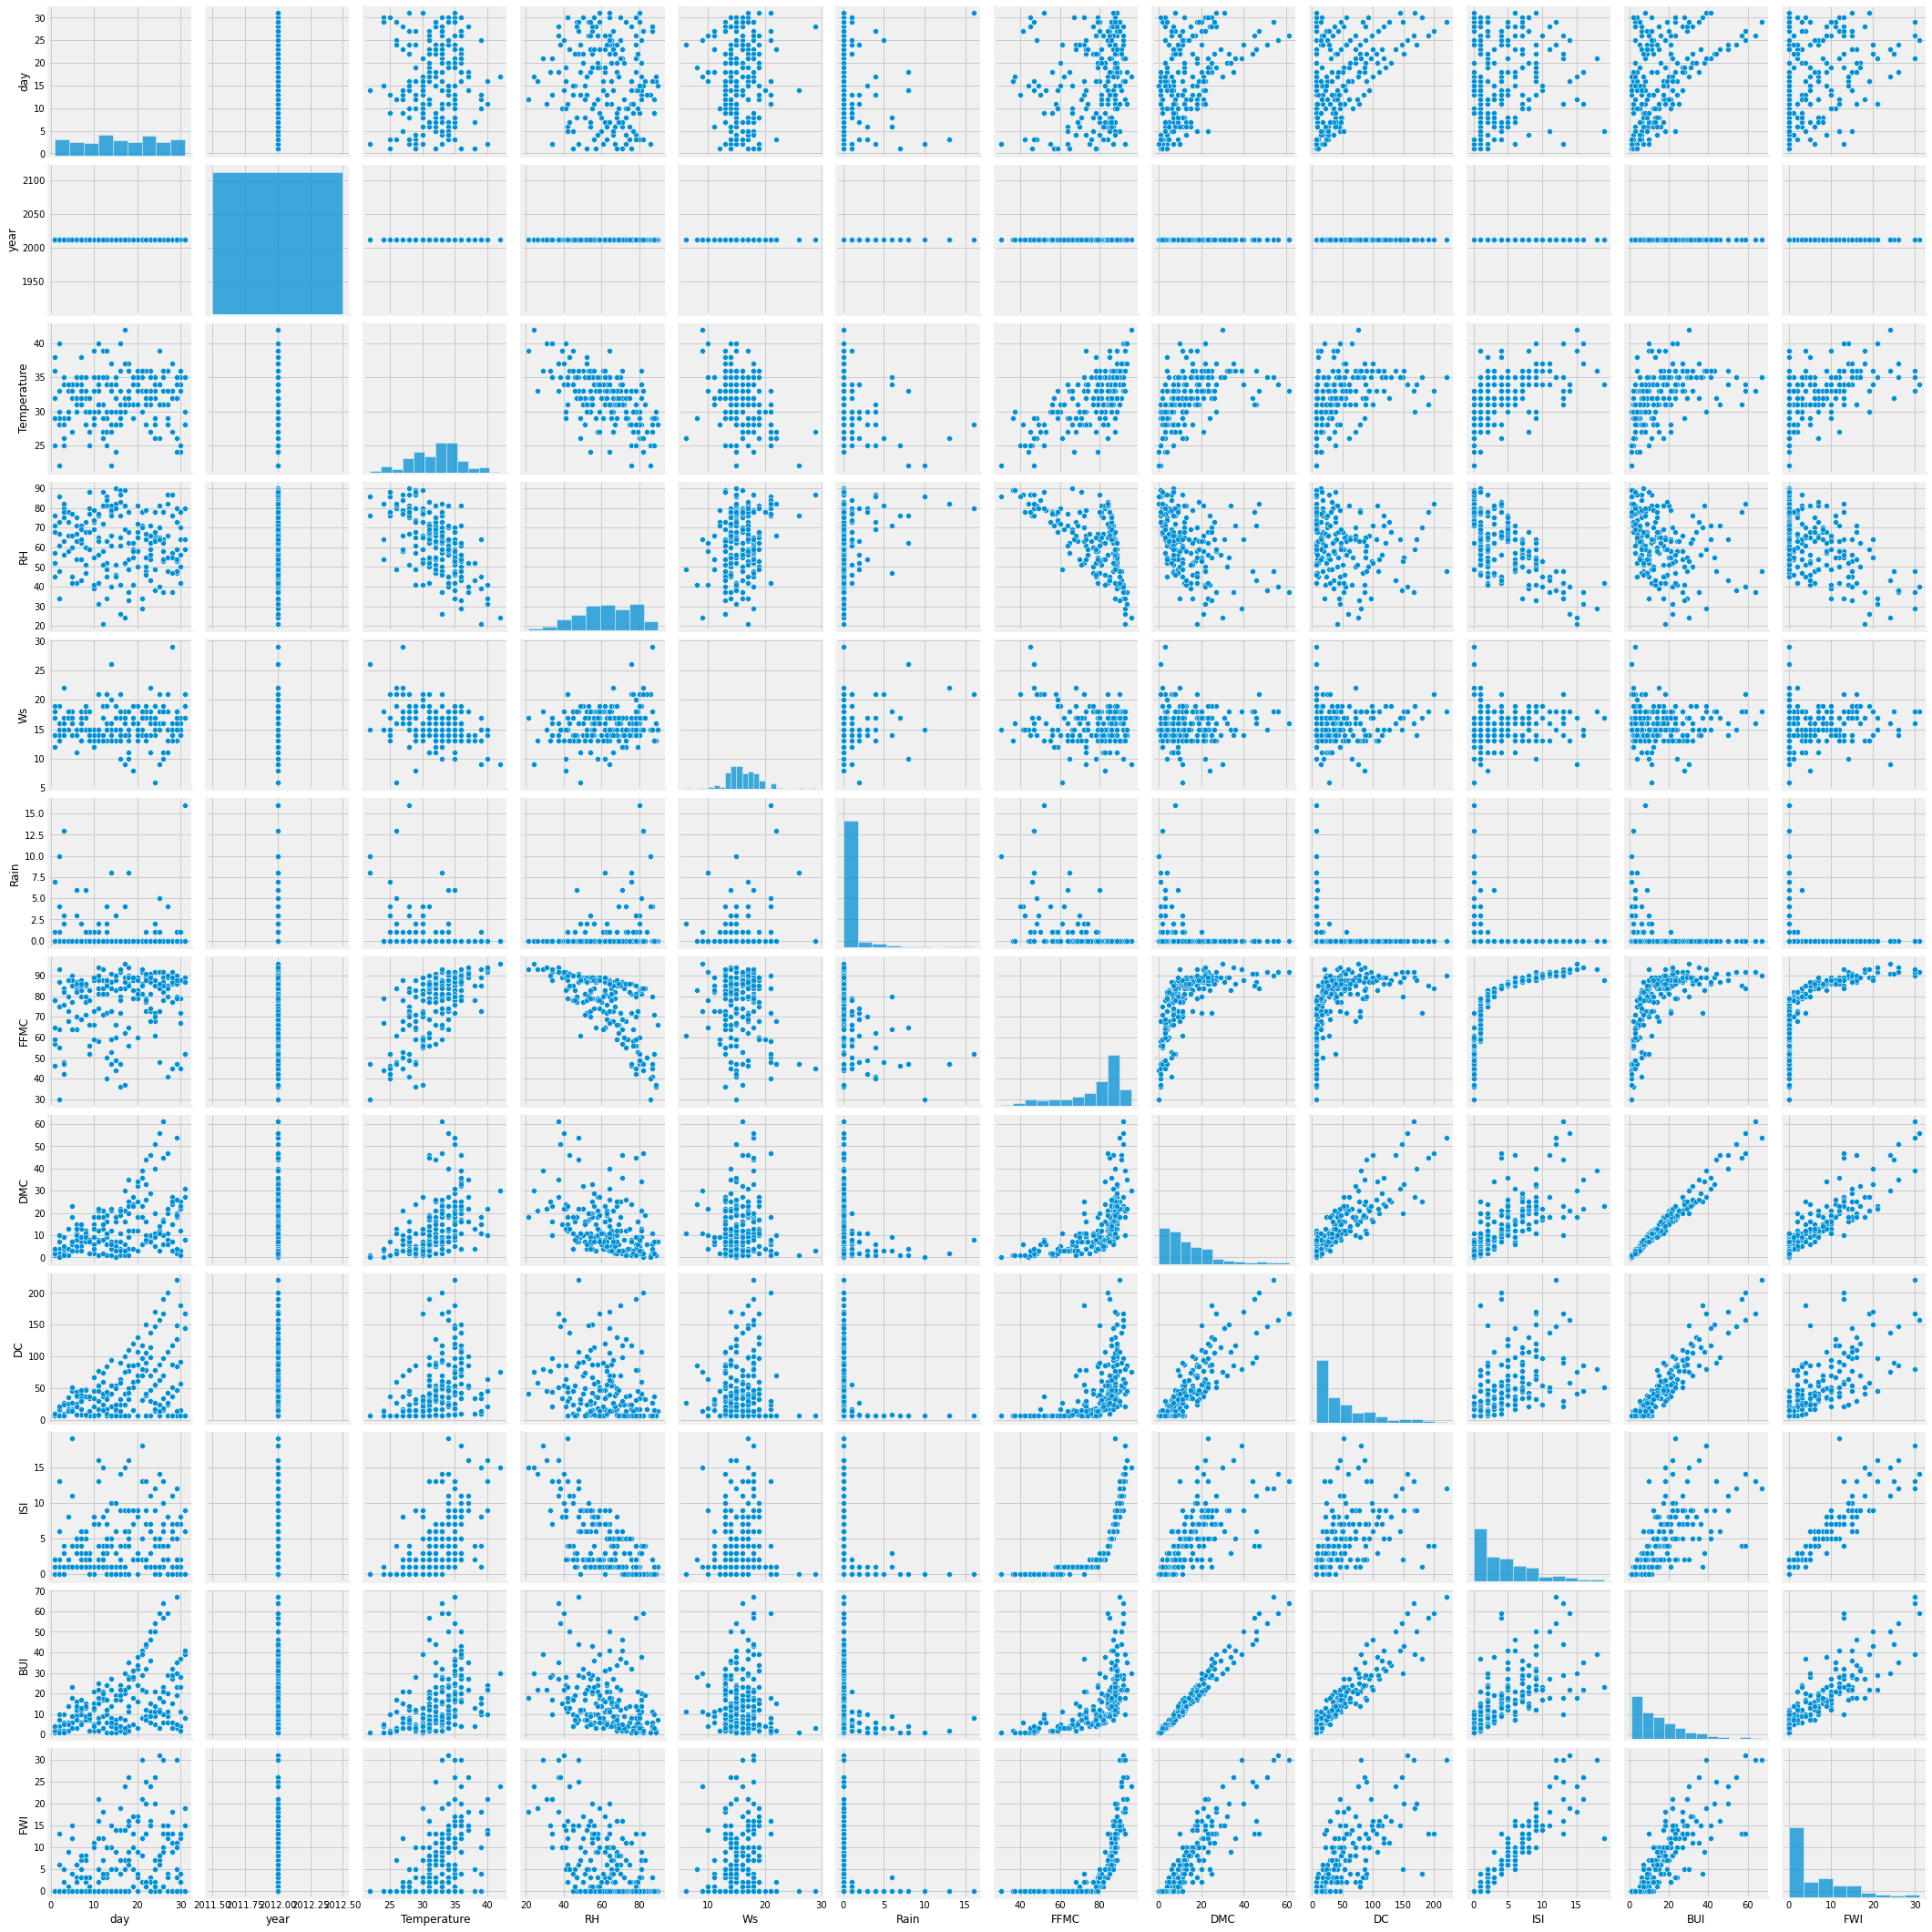

In [151]:
sns.pairplot(df)

<AxesSubplot:xlabel='Classes', ylabel='count'>

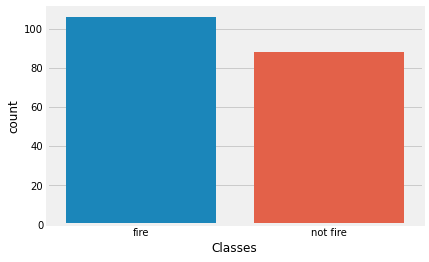

In [72]:
sns.countplot(x=df['Classes'])

# 📌

Claseses are not imbalanced here, so we are good to go

<AxesSubplot:xlabel='Region', ylabel='count'>

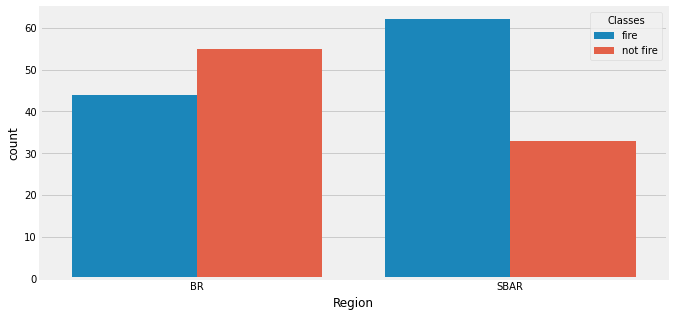

In [73]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Region'], hue=df['Classes'])

<Figure size 720x360 with 0 Axes>

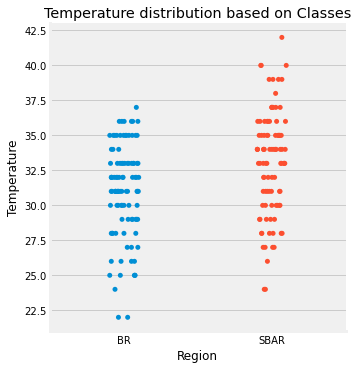

<Figure size 720x360 with 0 Axes>

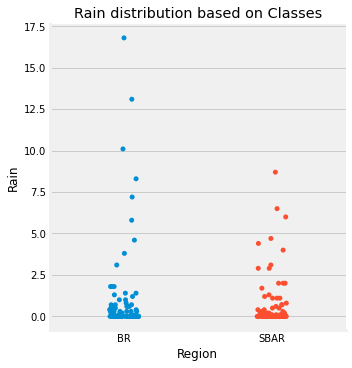

<Figure size 720x360 with 0 Axes>

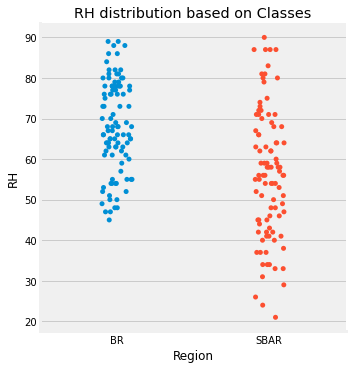

<Figure size 720x360 with 0 Axes>

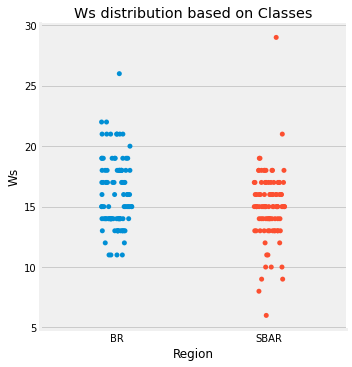

In [74]:
for column in ['Temperature', 'Rain', 'RH', 'Ws']:
    plt.figure(figsize=(10,5))
    sns.catplot(data=df, x='Region', y=column)
    plt.title(f'{column} distribution based on Classes')
    plt.show()

# 📌

Count of fire is high in Sidi-Bel Abbes Region, because Temperature of this region remains high and rainfall is less

<AxesSubplot:xlabel='month', ylabel='count'>

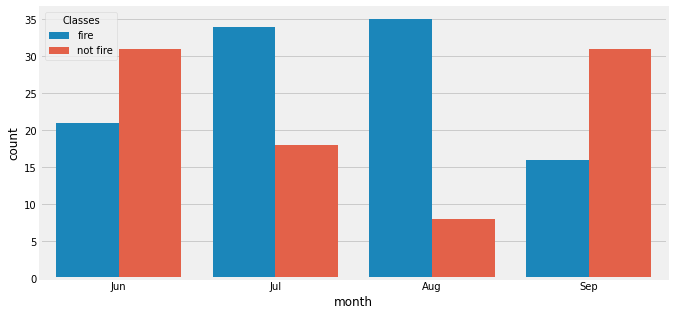

In [75]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['month'], hue=df['Classes'], order=['Jun', 'Jul', 'Aug', 'Sep'])

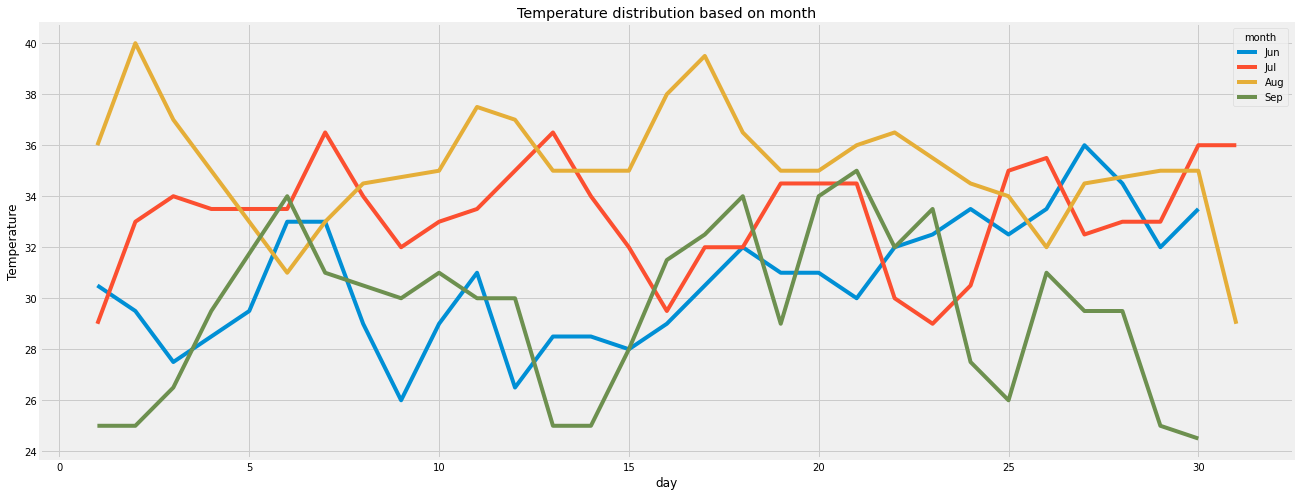

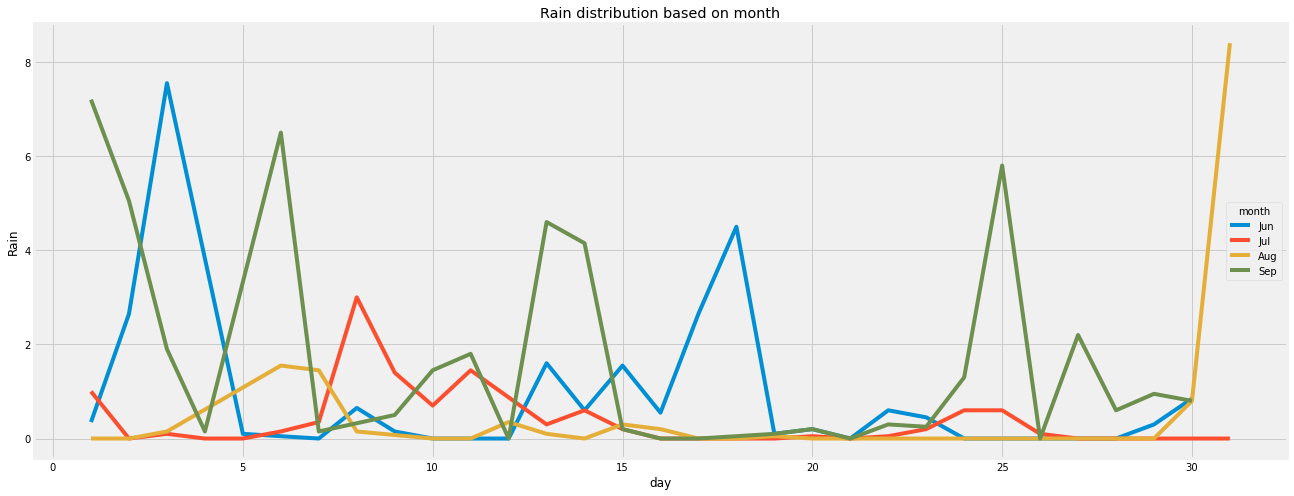

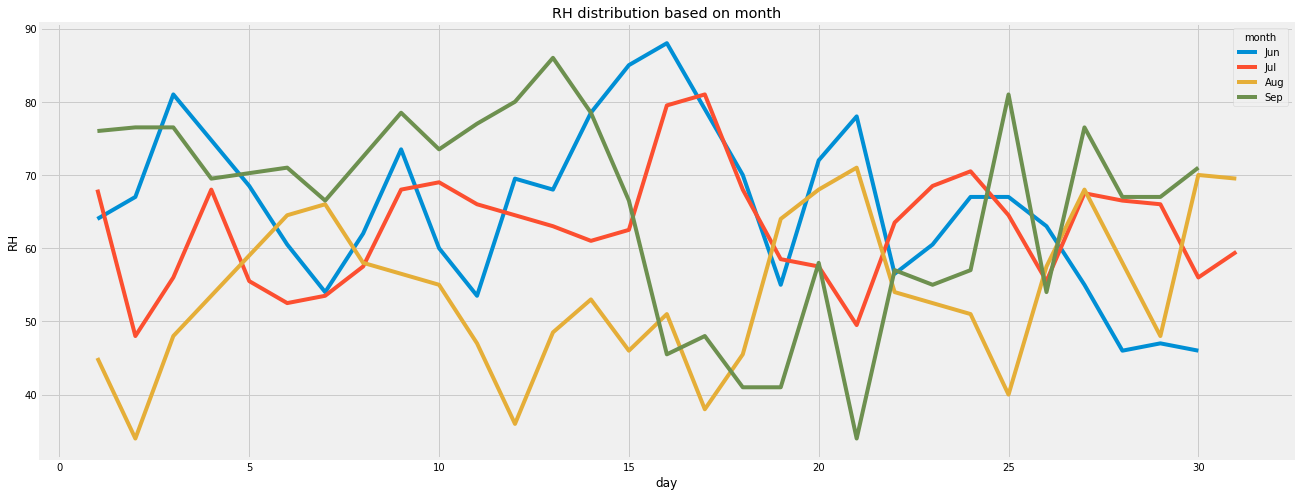

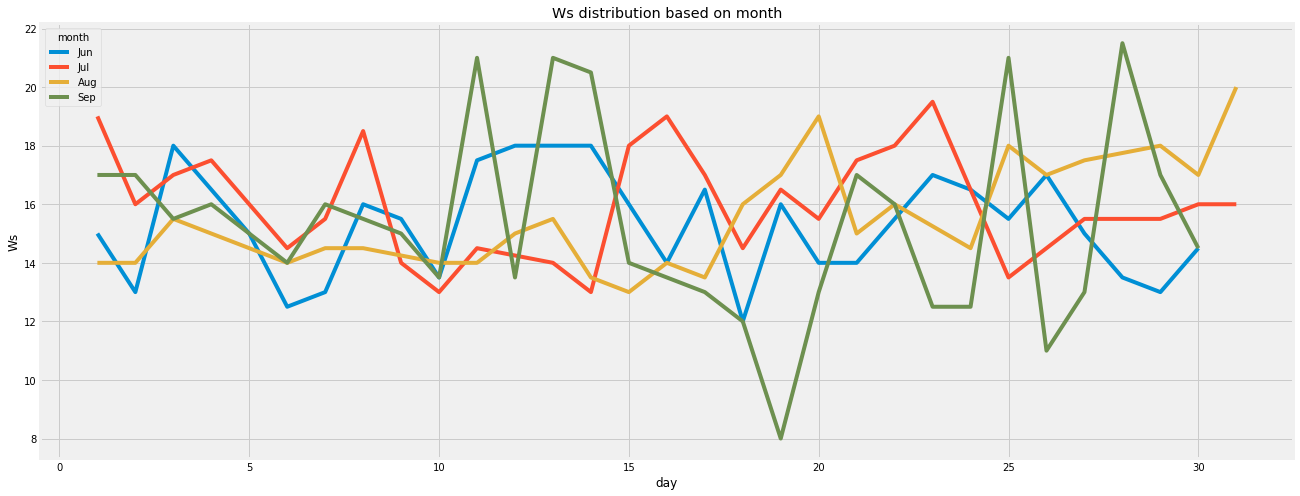

In [76]:
for column in ['Temperature', 'Rain', 'RH', 'Ws']:
    plt.figure(figsize=(20,8))
    sns.lineplot(x=df['day'], y=df[column], hue=df['month'], ci=None, hue_order=['Jun', 'Jul', 'Aug', 'Sep'])
    plt.title(f'{column} distribution based on month')
    plt.show()

# 📌

From the above analysis we can see that maximum fire was happend in August month, because of the high temperature and low rain 

<AxesSubplot:xlabel='day_name', ylabel='count'>

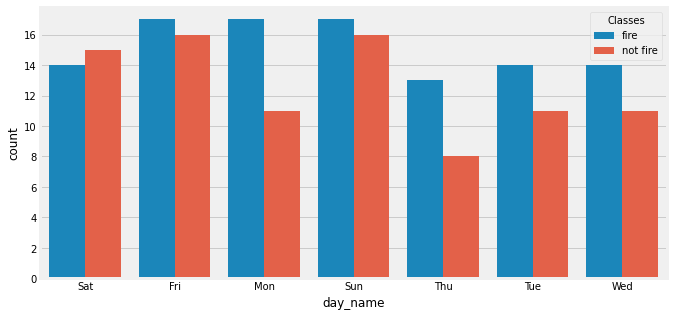

In [77]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['day_name'], hue=df['Classes'])

Text(0.5, 1.0, 'Fire based on month and Region')

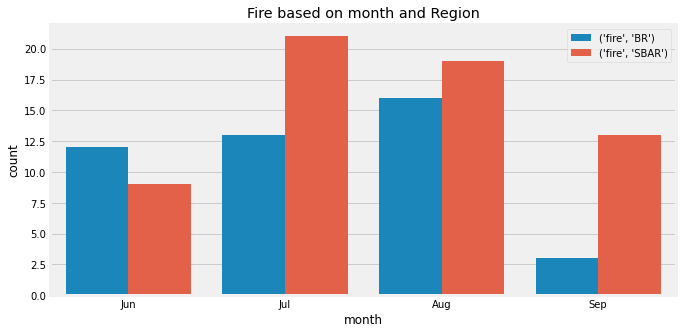

In [78]:
plt.figure(figsize=(10,5))
fire=df[df['Classes']=='fire']
sns.countplot(x=fire['month'], order=['Jun', 'Jul', 'Aug', 'Sep'], hue=fire[['Classes', 'Region']].apply(tuple, axis=1))
plt.title('Fire based on month and Region')

Text(0.5, 1.0, 'Fire based on day')

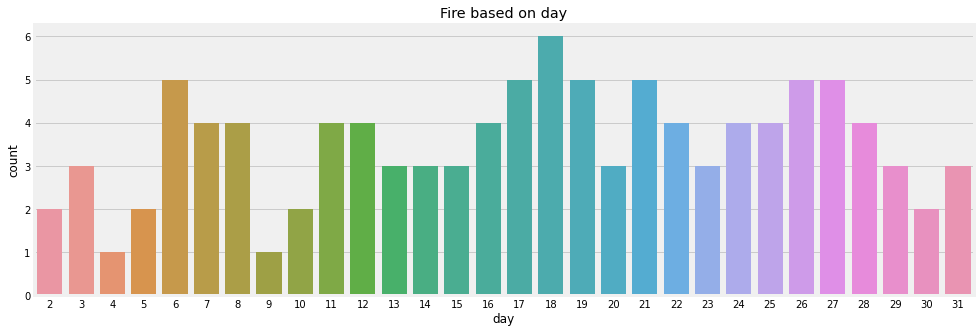

In [79]:
plt.figure(figsize=(15,5))
sns.countplot(x=df[df['Classes']=='fire']['day'])
plt.title("Fire based on day")

<Figure size 720x360 with 0 Axes>

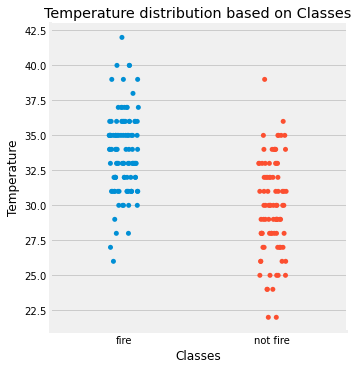

<Figure size 720x360 with 0 Axes>

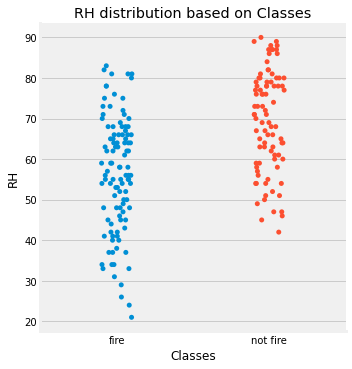

<Figure size 720x360 with 0 Axes>

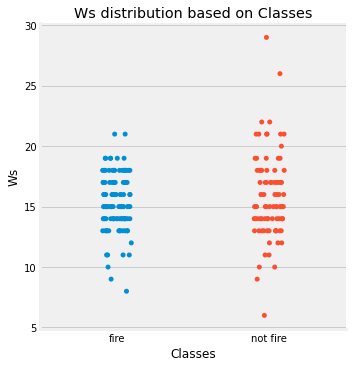

<Figure size 720x360 with 0 Axes>

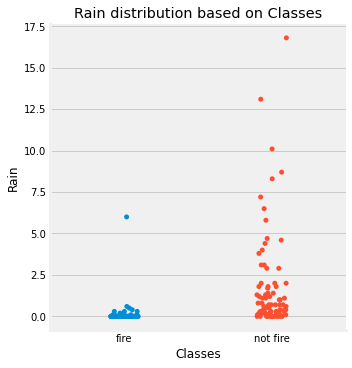

<Figure size 720x360 with 0 Axes>

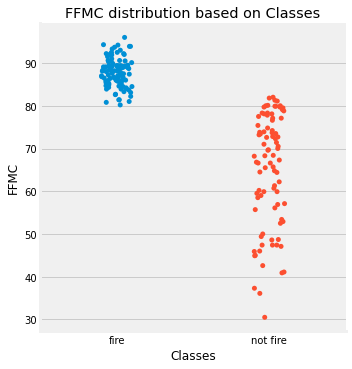

<Figure size 720x360 with 0 Axes>

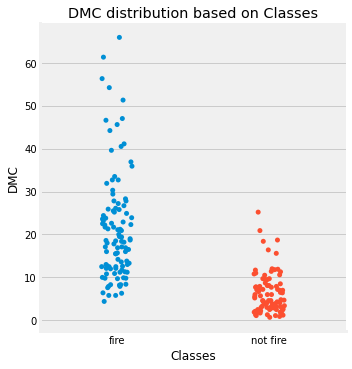

<Figure size 720x360 with 0 Axes>

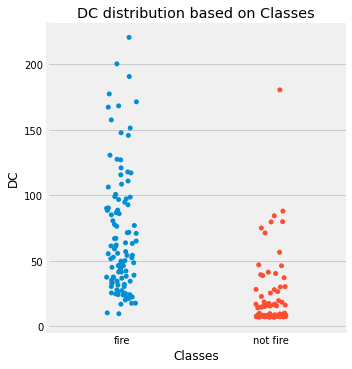

<Figure size 720x360 with 0 Axes>

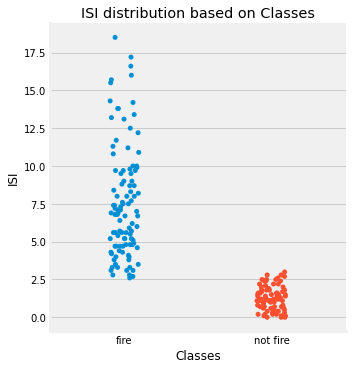

<Figure size 720x360 with 0 Axes>

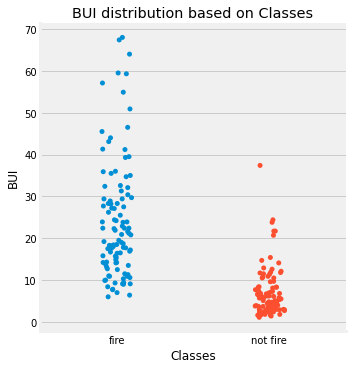

<Figure size 720x360 with 0 Axes>

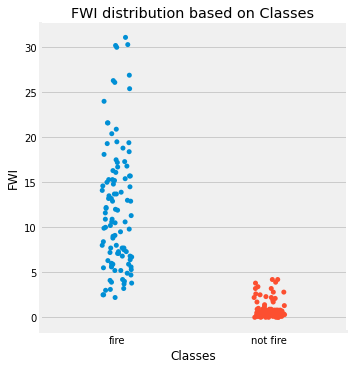

In [80]:
for column in df.drop(columns=['day', 'month', 'year', 'day_name', 'Region', 'Classes']):
    plt.figure(figsize=(10,5))
    sns.catplot(data=df, x='Classes', y=column)
    plt.title(f'{column} distribution based on Classes')
    plt.show()

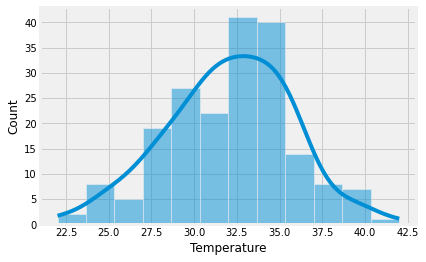

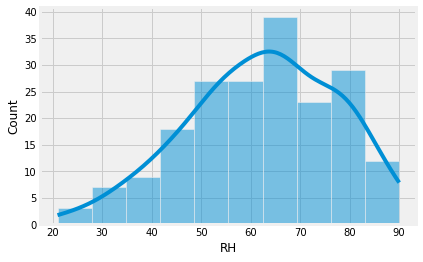

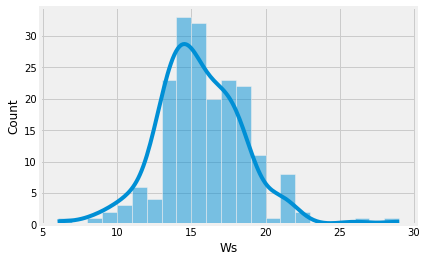

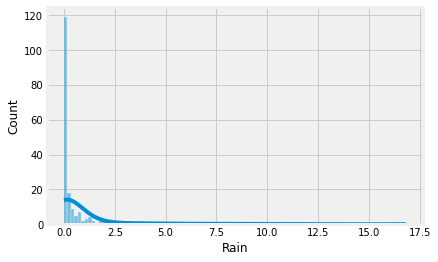

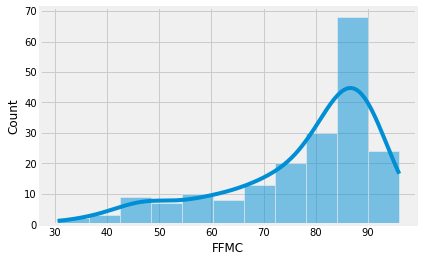

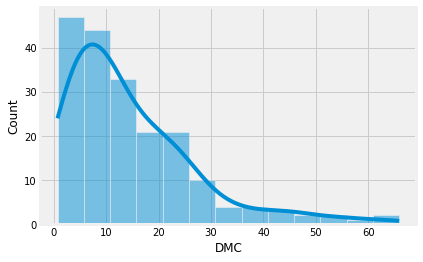

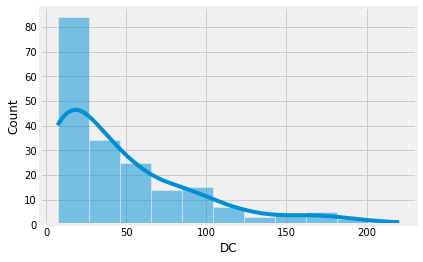

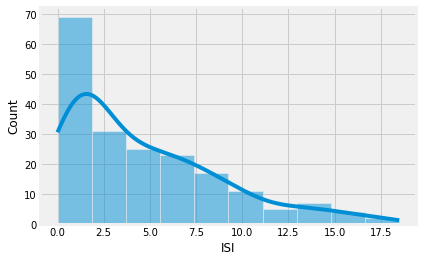

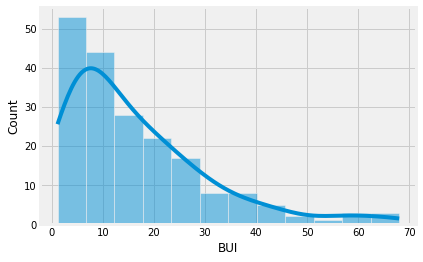

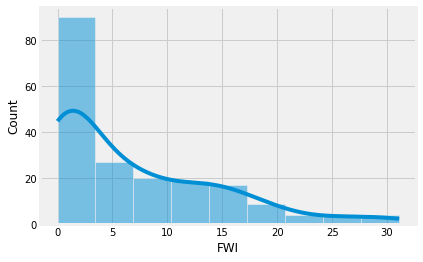

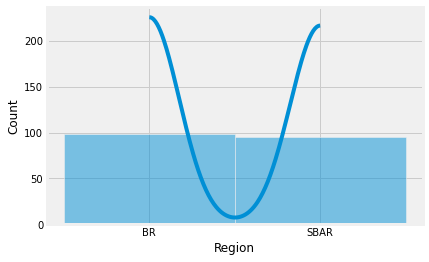

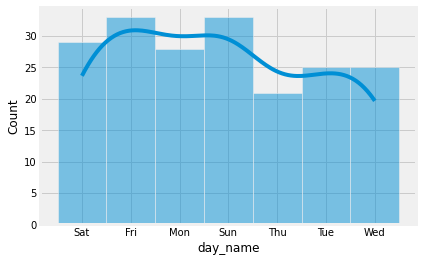

In [81]:
for column in df.drop(columns=['Classes', 'year', 'month', 'day']):
    sns.histplot(df[column], kde=True)
    plt.show()

# 📌

We can see that data has variance, so we have to scale the data

# 📌

Dropping year and day column because they have no contribution

In [82]:
final_df=df.drop(columns=['year', 'day'])

## Separating dataset into categorical and numerical column

In [83]:
final_df

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes,day_name
0,Jun,33,50,14,0.0,88.7,22.9,92.8,7.2,28.3,12.9,BR,fire,Sat
1,Jul,34,81,15,0.0,81.8,9.7,37.2,3.0,11.7,3.4,BR,not fire,Fri
2,Sep,29,65,19,0.6,68.3,5.5,15.2,1.5,5.8,0.7,BR,not fire,Mon
3,Jul,34,45,17,0.0,90.5,18.0,24.1,10.9,17.7,14.1,SBAR,fire,Sun
4,Sep,30,80,15,0.0,83.1,7.9,34.5,3.5,10.0,3.7,SBAR,fire,Sun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Aug,33,82,21,0.0,84.9,47.0,200.2,4.4,59.3,13.2,BR,fire,Mon
190,Sep,29,88,13,0.0,71.0,2.6,16.6,1.2,3.7,0.5,BR,not fire,Wed
191,Aug,32,69,16,0.0,86.5,15.5,48.6,5.5,17.2,8.0,BR,fire,Tue
192,Jun,31,64,15,0.0,86.7,14.2,63.8,5.7,18.3,8.4,BR,fire,Mon


In [84]:
cat_df=final_df[['month', 'day_name', 'Classes', 'Region']]
cat_df

,month,day_name,Classes,Region
0,Jun,Sat,fire,BR
1,Jul,Fri,not fire,BR
2,Sep,Mon,not fire,BR
3,Jul,Sun,fire,SBAR
4,Sep,Sun,fire,SBAR
...,...,...,...,...
189,Aug,Mon,fire,BR
190,Sep,Wed,not fire,BR
191,Aug,Tue,fire,BR
192,Jun,Mon,fire,BR


In [85]:
num_df=final_df.drop(columns=['month', 'day_name', 'Classes', 'Region'])
num_df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,33,50,14,0.0,88.7,22.9,92.8,7.2,28.3,12.9
1,34,81,15,0.0,81.8,9.7,37.2,3.0,11.7,3.4
2,29,65,19,0.6,68.3,5.5,15.2,1.5,5.8,0.7
3,34,45,17,0.0,90.5,18.0,24.1,10.9,17.7,14.1
4,30,80,15,0.0,83.1,7.9,34.5,3.5,10.0,3.7
...,...,...,...,...,...,...,...,...,...,...
189,33,82,21,0.0,84.9,47.0,200.2,4.4,59.3,13.2
190,29,88,13,0.0,71.0,2.6,16.6,1.2,3.7,0.5
191,32,69,16,0.0,86.5,15.5,48.6,5.5,17.2,8.0
192,31,64,15,0.0,86.7,14.2,63.8,5.7,18.3,8.4


# Outlier

In [86]:
num_df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,32.025773,62.262887,15.567010,0.826289,77.425773,14.623196,48.177835,4.703608,16.582474,7.039691
std,3.666733,14.970713,2.955305,2.171263,14.597542,12.394564,45.445267,4.195401,14.037714,7.601474
min,22.000000,21.000000,6.000000,0.000000,30.500000,0.700000,7.000000,0.000000,1.100000,0.000000
25%,30.000000,53.000000,14.000000,0.000000,70.125000,5.850000,11.350000,1.300000,6.125000,0.700000
50%,32.000000,63.500000,15.000000,0.000000,83.200000,11.250000,33.800000,3.300000,12.300000,4.150000
75%,35.000000,73.750000,17.000000,0.500000,88.175000,20.675000,70.050000,7.100000,22.400000,11.975000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,18.500000,68.000000,31.100000


<AxesSubplot:>

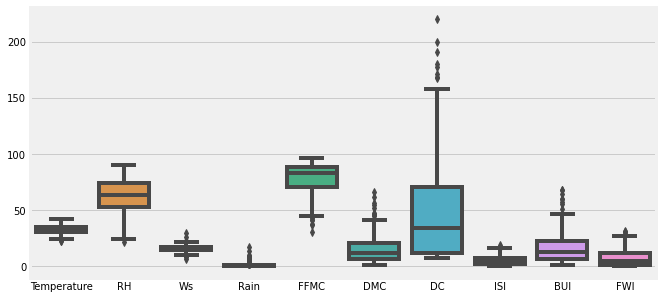

In [87]:
plt.figure(figsize=(10,5))
sns.boxplot(data=num_df)

# 📌

Based on the dataset description (https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++), we can see that no data is out of the range. So, we don't need to remove any data.

## Correlation

<AxesSubplot:>

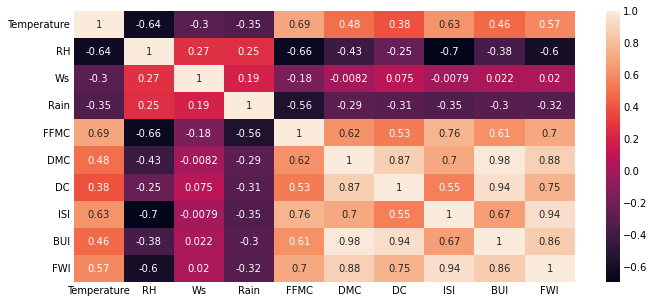

In [88]:
plt.figure(figsize=(10,5))
sns.heatmap(num_df.corr(), annot=True)

# 📌

We can see there is high correlation between BUI & DMC(0.98), BUI & DC(0.94), ISI & FWI(0.92)

Here is the information about these columns:

#### Duff Moisture Code

The Duff Moisture Code (DMC) is a numeric rating of the average moisture content of loosely compacted organic layers of moderate depth. This code gives an indication of fuel consumption in moderate duff layers and medium-size woody material.

#### Drought Code

The Drought Code (DC) is a numeric rating of the average moisture content of deep, compact organic layers. This code is a useful indicator of seasonal drought effects on forest fuels and the amount of smoldering in deep duff layers and large logs.

#### Buildup Index

The Buildup Index (BUI) is a numeric rating of the total amount of fuel available for combustion. It is based on the DMC and the DC. The BUI is generally less than twice the DMC value, and moisture in the DMC layer is expected to help prevent burning in material deeper down in the available fuel.

#### Initial Spread Index

The Initial Spread Index (ISI) is a numeric rating of the expected rate of fire spread. It is based on wind speed and FFMC. Like the rest of the FWI system components, ISI does not take fuel type into account. Actual spread rates vary between fuel types at the same ISI.

#### Fire Weather Index

The Fire Weather Index (FWI) is a numeric rating of fire intensity. It is based on the ISI and the BUI, and is used as a general index of fire danger throughout the forested areas of Canada.

Based on the above information we decided to remove BUI and FWI column

In [89]:
num_df=num_df.drop(columns=['BUI', 'FWI'])
num_df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI
0,33,50,14,0.0,88.7,22.9,92.8,7.2
1,34,81,15,0.0,81.8,9.7,37.2,3.0
2,29,65,19,0.6,68.3,5.5,15.2,1.5
3,34,45,17,0.0,90.5,18.0,24.1,10.9
4,30,80,15,0.0,83.1,7.9,34.5,3.5


## Scaling

In [90]:
scaler=StandardScaler()
num_array1=scaler.fit_transform(num_df)

In [91]:
num_df=pd.DataFrame(num_array1, columns=num_df.columns)
num_df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI
0,0.266381,-0.821244,-0.531608,-0.381541,0.774336,0.669505,0.984429,0.596570
1,0.539809,1.254823,-0.192358,-0.381541,0.300430,-0.398234,-0.242187,-0.407116
2,-0.827331,0.183304,1.164642,-0.104489,-0.626776,-0.737969,-0.727538,-0.765576
3,0.539809,-1.156094,0.486142,-0.381541,0.897963,0.273147,-0.531191,1.480770
4,-0.553903,1.187853,-0.192358,-0.381541,0.389717,-0.543834,-0.301753,-0.287630
...,...,...,...,...,...,...,...,...
189,0.266381,1.321793,1.843142,-0.381541,0.513344,2.618936,3.353826,-0.072554
190,-0.827331,1.723612,-0.870858,-0.381541,-0.441334,-0.972548,-0.696652,-0.837268
191,-0.007047,0.451184,0.146892,-0.381541,0.623235,0.070924,0.009314,0.190316
192,-0.280475,0.116334,-0.192358,-0.381541,0.636972,-0.034232,0.344647,0.238111


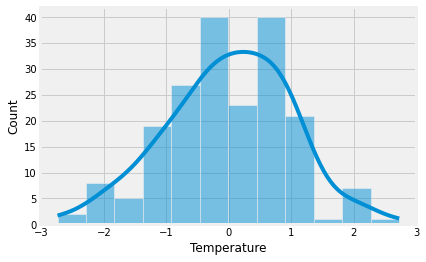

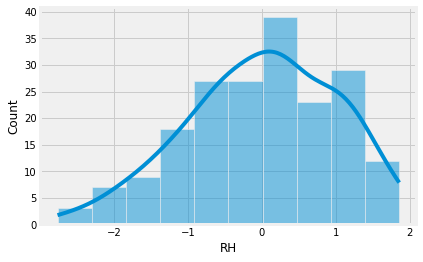

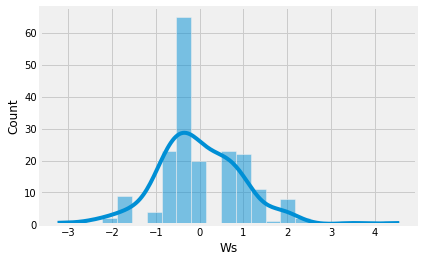

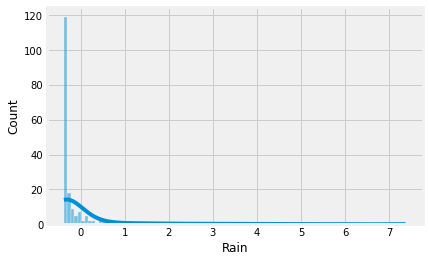

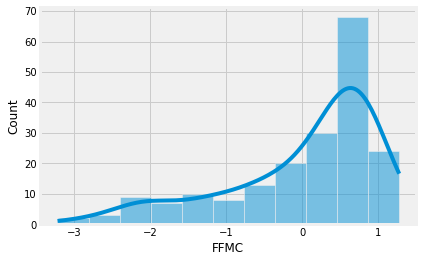

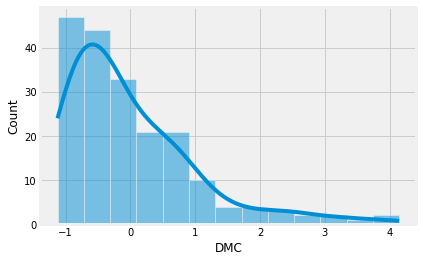

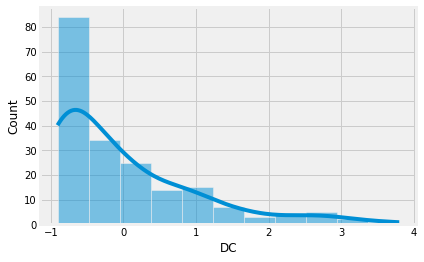

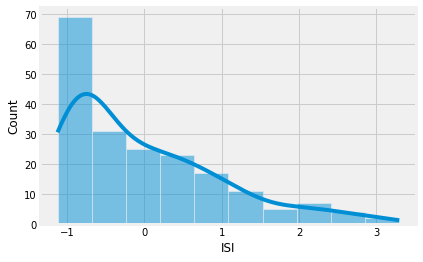

In [92]:
for column in num_df:
    sns.histplot(num_df[column], kde=True)
    plt.show()

# 📌

There is not much change in the distribution after scaling

## Encoding of categorical variables

In [94]:
cat_df['month']=cat_df['month'].map({'Aug':3, 'Jul':2, 'Jun':1, 'Sep':0})  
cat_df['Region']=cat_df['Region'].map({'SBAR':1, 'BR':0})

# 📌

We will give more weightage to Aug month because most of the fire occured on this month, then other months respectively

In [95]:
cat_df['Classes']=cat_df['Classes'].map({'fire':1, 'not fire':0})

In [96]:
encoder=OneHotEncoder(drop="first", sparse=False)
day_names_array=encoder.fit_transform(cat_df[['day_name']])
day_names=pd.DataFrame(day_names_array, columns=encoder.get_feature_names_out())
day_names

,day_name_Mon,day_name_Sat,day_name_Sun,day_name_Thu,day_name_Tue,day_name_Wed
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
189,1.0,0.0,0.0,0.0,0.0,0.0
190,0.0,0.0,0.0,0.0,0.0,1.0
191,0.0,0.0,0.0,0.0,1.0,0.0
192,1.0,0.0,0.0,0.0,0.0,0.0


In [98]:
cat_df=cat_df.drop(columns=['day_name'])
cat_df=pd.concat([cat_df, day_names], axis=1)
cat_df.head()

,month,Classes,Region,day_name_Mon,day_name_Sat,day_name_Sun,day_name_Thu,day_name_Tue,day_name_Wed
0,1,1,0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0
3,2,1,1,0.0,0.0,1.0,0.0,0.0,0.0
4,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0


In [99]:
final_df=pd.concat([num_df, cat_df], axis=1)
final_df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,month,Classes,Region,day_name_Mon,day_name_Sat,day_name_Sun,day_name_Thu,day_name_Tue,day_name_Wed
0,0.266381,-0.821244,-0.531608,-0.381541,0.774336,0.669505,0.984429,0.596570,1,1,0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.539809,1.254823,-0.192358,-0.381541,0.300430,-0.398234,-0.242187,-0.407116,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.827331,0.183304,1.164642,-0.104489,-0.626776,-0.737969,-0.727538,-0.765576,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.539809,-1.156094,0.486142,-0.381541,0.897963,0.273147,-0.531191,1.480770,2,1,1,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.553903,1.187853,-0.192358,-0.381541,0.389717,-0.543834,-0.301753,-0.287630,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,0.266381,1.321793,1.843142,-0.381541,0.513344,2.618936,3.353826,-0.072554,3,1,0,1.0,0.0,0.0,0.0,0.0,0.0
190,-0.827331,1.723612,-0.870858,-0.381541,-0.441334,-0.972548,-0.696652,-0.837268,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
191,-0.007047,0.451184,0.146892,-0.381541,0.623235,0.070924,0.009314,0.190316,3,1,0,0.0,0.0,0.0,0.0,1.0,0.0
192,-0.280475,0.116334,-0.192358,-0.381541,0.636972,-0.034232,0.344647,0.238111,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0
